In [3]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import GlobalAveragePooling2D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.layers import BatchNormalization
import os 
import pandas as pd
import plotly.graph_objs as go
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

In [4]:
!pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/














Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds

Your Kaggle username: rudraganeshr

Your Kaggle Key: ··········



100%|██████████| 2.70G/2.70G [00:12<00:00, 227MB/s]


In [5]:
train ='/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'
validation_dir = '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [6]:
import glob
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [7]:
train_samples =get_files(train)
num_classes=len(glob.glob(train+"/*"))
test_samples=get_files(validation_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

38 Classes

70295 Train images

17572 Test images


In [8]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
img_width,img_height =224,224
input_shape=(img_width,img_height,3)
batch_size =64
train_generator =train_datagen.flow_from_directory(train,
                                target_size=(img_width,img_height),batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(validation_dir,shuffle=True,target_size=(img_width,img_height),batch_size=batch_size)

Found 70295 images belonging to 38 classes.

Found 17572 images belonging to 38 classes.


In [9]:
from tensorflow import keras
from keras import layers
model = keras.Sequential([
    layers.Input((224, 224, 3)),
    
    layers.Conv2D(16, 3, activation="relu"),
    layers.BatchNormalization(), # Regularization
    layers.MaxPooling2D(), 
    
    layers.Conv2D(32, 3, activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    
    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2), # Regularization
    layers.Dense(38, activation="softmax"),
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)
history = model.fit(train_generator,validation_data=test_generator,epochs=10,shuffle=True)

Epoch 1/10

1099/1099 [==============================] - 953s 846ms/step - loss: 0.8517 - accuracy: 0.7654 - val_loss: 0.5258 - val_accuracy: 0.8320

Epoch 2/10

1099/1099 [==============================] - 915s 833ms/step - loss: 0.3219 - accuracy: 0.9008 - val_loss: 0.5201 - val_accuracy: 0.8416

Epoch 3/10

1099/1099 [==============================] - 913s 831ms/step - loss: 0.2203 - accuracy: 0.9308 - val_loss: 1.4013 - val_accuracy: 0.6890

Epoch 4/10

1099/1099 [==============================] - 914s 832ms/step - loss: 0.1707 - accuracy: 0.9453 - val_loss: 0.4517 - val_accuracy: 0.8658

Epoch 5/10

1099/1099 [==============================] - 933s 849ms/step - loss: 0.1500 - accuracy: 0.9520 - val_loss: 0.3542 - val_accuracy: 0.8962

Epoch 6/10

1099/1099 [==============================] - 953s 867ms/step - loss: 0.1306 - accuracy: 0.9581 - val_loss: 0.4430 - val_accuracy: 0.8803

Epoch 7/10

1099/1099 [==============================] - 922s 839ms/step - loss: 0.1129 - accuracy: 

#Confusion Matrix

275/275 [==============================] - 52s 190ms/step


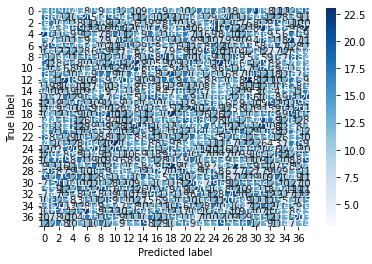

In [11]:
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_labels)
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Classification report

In [12]:
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes
from sklearn.metrics import classification_report

report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())
print(report)

275/275 [==============================] - 52s 190ms/step

                                                    precision    recall  f1-score   support



                                Apple___Apple_scab       0.02      0.02      0.02       504

                                 Apple___Black_rot       0.03      0.03      0.03       497

                          Apple___Cedar_apple_rust       0.02      0.03      0.02       440

                                   Apple___healthy       0.03      0.03      0.03       502

                               Blueberry___healthy       0.02      0.02      0.02       454

          Cherry_(including_sour)___Powdery_mildew       0.02      0.02      0.02       421

                 Cherry_(including_sour)___healthy       0.03      0.03      0.03       456

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.03      0.03      0.03       410

                       Corn_(maize)___Common_rust_       0.03      0.03      0.03       477

         

#Saving the Model

In [13]:
model.save('CNN_model.h5')

# user test case


In [29]:
img='/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold/0160c3b5-d89e-40e5-a313-49ae1524040a___Crnl_L.Mold 6823_180deg.JPG'

In [30]:
def predict_disease(test_image):
  img = cv2.imread(test_image)
  img = img / 255.0
  img = cv2.resize(img, (224, 224))
  img = img.reshape(1,224,224,3)
  prediction = model.predict(img)
  pred_class = np.argmax(prediction, axis = -1)
  return pred_class

In [31]:
pred = predict_disease(img)

1/1 [==============================] - 0s 31ms/step


In [32]:
d = pred[0]

In [33]:
d

31

In [34]:
Plant_disease = [  'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus',  'Tomato___healthy']


In [35]:
Plant_disease[d]

'Tomato___Leaf_Mold'

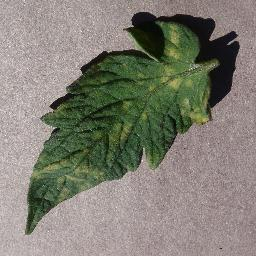

In [36]:
# from google.colab import files
from IPython.display import Image

# # Upload your image file to Colab
# uploaded = files.upload()

# # Get the file name
# file_name = next(iter(uploaded))

# # Display the image
Image(img)